<a href="https://colab.research.google.com/github/ELBrown11/StarbucksCapstoneChallenge/blob/main/Starbucks_Capstone_Heuristics_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import plotly.express as px

# **Import Cleaned Data**

In [3]:
cleaned_data = pd.read_csv('/content/drive/MyDrive/Udacity DS Nanodegree/Capstone Project/cleaned_df.csv', low_memory=False)[['user_id','offer_id','offer_status' , 'offer_type', 'gender', 'age',
       'income']]

In [4]:
cleaned_data.head()

,user_id,offer_id,offer_status,offer_type,gender,age,income
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,bogo,F,75.0,100000.0
1,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,offer received,discount,M,68.0,70000.0
2,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,offer received,bogo,M,65.0,53000.0
3,2eeac8d8feae4a8cad5a6af0499a211d,3f207df678b143eea3cee63160fa8bed,offer received,informational,M,58.0,51000.0
4,aa4862eba776480b8bb9c68455b8c2e1,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,discount,F,61.0,57000.0


# **Group Users Into Demographic Groups**
- age groups:  '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'
- gender: m, f, o
  - keeping other because could be real data representing people who don't consider themselves m or f
- income brackets: '<65k', '65-100k', '100k+'

In [5]:
def create_demographic_groups(df):
    """
    Adds age group, income bracket, and membership length categories to a DataFrame.

    Args:
        df (DataFrame): DataFrame with 'age' and 'income' columns.

    Returns:
        DataFrame: Original DataFrame with 'age_group', 'income_bracket', and 'membership_length' columns added.
    """

    df = df.copy()

    # Age groups
    age_bins = [18, 24, 34, 44, 54, 64, 74, 84, 101]
    age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

    # Income brackets
    income_bins = [0, 65000, 100000, 1000000]
    income_labels = ['<65k', '65-100k', '100k+']
    df['income_bracket'] = pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)



    return df

In [6]:
grouped_df = create_demographic_groups(cleaned_data)

In [7]:
grouped_df.head()

,user_id,offer_id,offer_status,offer_type,gender,age,income,age_group,income_bracket
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,bogo,F,75.0,100000.0,75-84,100k+
1,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,offer received,discount,M,68.0,70000.0,65-74,65-100k
2,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,offer received,bogo,M,65.0,53000.0,65-74,<65k
3,2eeac8d8feae4a8cad5a6af0499a211d,3f207df678b143eea3cee63160fa8bed,offer received,informational,M,58.0,51000.0,55-64,<65k
4,aa4862eba776480b8bb9c68455b8c2e1,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,discount,F,61.0,57000.0,55-64,<65k


# **Create Segment Column**
- column that can me used to put users in matching demo groups?


In [8]:
def create_segment(df):
    """
    Create a combined segment string from demographic groups.

    Args:
        df (DataFrame): DataFrame with 'gender', 'age_group', 'income_bracket'

    Returns:
        DataFrame: Original DataFrame with 'segment' column added.
    """
    df = df.copy()

    # Drop rows with missing demographic info before creating the segment
    df = df.dropna(subset=['gender', 'age_group', 'income_bracket'])


    # Create segment string
    df['segment'] = (
        df['gender'].astype(str) + ', ' +
        df['age_group'].astype(str) + ', ' +
        df['income_bracket'].astype(str)

    )

    return df


In [9]:
#adds segment column to dataframe
segment_data = create_segment(grouped_df)

In [10]:
segment_data.head()

,user_id,offer_id,offer_status,offer_type,gender,age,income,age_group,income_bracket,segment
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,bogo,F,75.0,100000.0,75-84,100k+,"F, 75-84, 100k+"
1,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,offer received,discount,M,68.0,70000.0,65-74,65-100k,"M, 65-74, 65-100k"
2,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,offer received,bogo,M,65.0,53000.0,65-74,<65k,"M, 65-74, <65k"
3,2eeac8d8feae4a8cad5a6af0499a211d,3f207df678b143eea3cee63160fa8bed,offer received,informational,M,58.0,51000.0,55-64,<65k,"M, 55-64, <65k"
4,aa4862eba776480b8bb9c68455b8c2e1,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,discount,F,61.0,57000.0,55-64,<65k,"F, 55-64, <65k"


- there are 62 different segments - which are customer grouping based on demographics
- essentially our data contain 62 different customer demographic types  


In [11]:
segment_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268693 entries, 0 to 268790
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   user_id         268693 non-null  object  
 1   offer_id        146564 non-null  object  
 2   offer_status    268693 non-null  object  
 3   offer_type      146564 non-null  object  
 4   gender          268693 non-null  object  
 5   age             268693 non-null  float64 
 6   income          268693 non-null  float64 
 7   age_group       268693 non-null  category
 8   income_bracket  268693 non-null  category
 9   segment         268693 non-null  object  
dtypes: category(2), float64(2), object(6)
memory usage: 19.0+ MB


- levels of missing data at this stage make sense
  - offer_id and offer_types have missing data due to there being less of them than users
  - offer_status has some missing because some users did not received offers but their data was kepts for completeness

In [12]:
segment_data['offer_type'].value_counts()

,count
offer_type,
bogo,62914
discount,61358
informational,22292


### **Flexible Completion Rate**
* completion = receieved  ➡ completed (doesn't require viewing)

In [13]:
def calculate_offer_response_rates_flex(df, segment):
    """
    Calculates view and completion rates for each offer type within each demographic segment.
    Filters out rows with missing or zero completion rates.

    Parameters:
    - df (pd.DataFrame): DataFrame containing at least ['user_id', 'offer_status', 'offer_type'] + segment_cols
    - segment_cols (list): List of demographic columns to use for segmentation.

    Returns:
    - pd.DataFrame: Summary of offer performance by segment, with view and completion rates.
    """

    # filter only offer-related events
    offer_df = df[df['offer_status'].isin([
        'offer received', 'offer viewed', 'offer completed'
    ])].copy()

    # keep only necessary columns
    keep_cols = ['user_id', 'offer_status', 'offer_type'] + segment
    offer_df = offer_df[keep_cols].copy()

    # create binary event flags
    offer_df['received'] = (offer_df['offer_status'] == 'offer received').astype(int)
    offer_df['viewed'] = (offer_df['offer_status'] == 'offer viewed').astype(int)
    offer_df['completed'] = (offer_df['offer_status'] == 'offer completed').astype(int)

    # aggregate by user + offer_type + segment
    group_cols = ['user_id', 'offer_type'] + segment
    user_offer_summary = offer_df.groupby(group_cols, observed=False).agg(
        received=('received', 'max'),
        viewed=('viewed', 'max'),
        completed=('completed', 'max')
    ).reset_index()

    # keep only users who received the offer
    user_offer_summary = user_offer_summary[user_offer_summary['received'] == 1].copy()

    # aggregate by offer type and segment
    segment_group_cols = ['offer_type'] + segment
    summary = user_offer_summary.groupby(segment_group_cols, observed=False).agg(
        Received=('received', 'count'),
        Viewed=('viewed', 'sum'),
        Completed=('completed', 'sum')
    ).reset_index()

    # calculate response rates
    summary['Viewed Rate (%)'] = np.where(
        summary['Received'] > 0,
        (summary['Viewed'] / summary['Received'] * 100).round(1),
        np.nan
    )
    summary['Completion Rate (%)'] = np.where(
        summary['Received'] > 0,
        (summary['Completed'] / summary['Received'] * 100).round(1),
        np.nan
    )

    # remove rows where Completion Rate is missing or 0
    summary = summary[
        (summary['Completion Rate (%)'].notna()) &
        (summary['Completion Rate (%)'] > 0)
    ].copy()

    # clean up memory
    del offer_df, user_offer_summary
    gc.collect()

    return summary


In [14]:
flex_df = calculate_offer_response_rates_flex(segment_data, ['segment'])


In [15]:
flex_df

,offer_type,segment,Received,Viewed,Completed,Viewed Rate (%),Completion Rate (%)
0,bogo,"F, 18-24, 65-100k",32,30,21,93.8,65.6
1,bogo,"F, 18-24, <65k",141,130,93,92.2,66.0
2,bogo,"F, 25-34, 65-100k",75,68,59,90.7,78.7
3,bogo,"F, 25-34, <65k",279,262,192,93.9,68.8
4,bogo,"F, 35-44, 100k+",3,3,3,100.0,100.0
...,...,...,...,...,...,...,...
83,discount,"M, 75-84, 65-100k",264,232,223,87.9,84.5
84,discount,"M, 75-84, <65k",279,226,173,81.0,62.0
85,discount,"M, 85+, 100k+",17,11,14,64.7,82.4
86,discount,"M, 85+, 65-100k",88,75,75,85.2,85.2


In [16]:
flex_df['offer_type'].value_counts()

,count
offer_type,
bogo,44
discount,44


### **Strict Completions Rate**
* completion  = viewed ➡ recieved ➡ completed

In [17]:
def calculate_offer_response_rates_strict(df, segment_cols):
    """
    Calculates strict view and completion rates for each offer type within each demographic segment.
    Only counts a completion if the offer was also viewed.

    Parameters:
    - df (pd.DataFrame): DataFrame containing at least ['user_id', 'offer_status', 'offer_type'] + segment_cols
    - segment_cols (list): List of demographic columns to use for segmentation.

    Returns:
    - pd.DataFrame: Summary of offer performance by segment, with strict view and completion rates.
    """
    #filter only offer-related events
    offer_df = df[df['offer_status'].isin([
        'offer received', 'offer viewed', 'offer completed'
    ])].copy()

    #keep only necessary columns
    keep_cols = ['user_id', 'offer_status', 'offer_type'] + segment_cols
    offer_df = offer_df[keep_cols].copy()

    #create binary flags for each event
    offer_df['received'] = (offer_df['offer_status'] == 'offer received').astype(int)
    offer_df['viewed'] = (offer_df['offer_status'] == 'offer viewed').astype(int)
    offer_df['completed'] = (offer_df['offer_status'] == 'offer completed').astype(int)

    #aggregate by user + offer_type + segment
    group_cols = ['user_id', 'offer_type'] + segment_cols
    user_offer_summary = offer_df.groupby(group_cols, observed=False).agg(
        received=('received', 'max'),
        viewed=('viewed', 'max'),
        completed=('completed', 'max')
    ).reset_index()

    #only keep users who received the offer
    user_offer_summary = user_offer_summary[user_offer_summary['received'] == 1].copy()

    #add a 'strictly_completed' flag = 1 only if viewed and completed
    user_offer_summary['strictly_completed'] = (
        (user_offer_summary['viewed'] == 1) &
        (user_offer_summary['completed'] == 1)
    ).astype(int)

    #aggregate by segment
    segment_group_cols = ['offer_type'] + segment_cols
    summary = user_offer_summary.groupby(segment_group_cols, observed=False).agg(
        Received=('received', 'count'),
        Viewed=('viewed', 'sum'),
        Strictly_Completed=('strictly_completed', 'sum')
    ).reset_index()

    #compute rates
    summary['Viewed Rate (%)'] = np.where(
        summary['Received'] > 0,
        (summary['Viewed'] / summary['Received'] * 100).round(1),
        np.nan
    )
    summary['Completion Rate (%)'] = np.where(
        summary['Received'] > 0,
        (summary['Strictly_Completed'] / summary['Received'] * 100).round(1),
        np.nan
    )

    #filter out empty results
    summary = summary[
        (summary['Completion Rate (%)'].notna()) &
        (summary['Completion Rate (%)'] > 0)
    ].copy()

    return summary

In [18]:
strict_df = calculate_offer_response_rates_strict(segment_data, ['segment'])
strict_df.head()

,offer_type,segment,Received,Viewed,Strictly_Completed,Viewed Rate (%),Completion Rate (%)
0,bogo,"F, 18-24, 65-100k",32,30,20,93.8,62.5
1,bogo,"F, 18-24, <65k",141,130,84,92.2,59.6
2,bogo,"F, 25-34, 65-100k",75,68,53,90.7,70.7
3,bogo,"F, 25-34, <65k",279,262,184,93.9,65.9
4,bogo,"F, 35-44, 100k+",3,3,3,100.0,100.0


In [19]:
strict_df.shape

(88, 7)

# **Data Visualization and Analysis**

## **Top 10 Demographic Segments Flexible v. Strict Completion Rate**

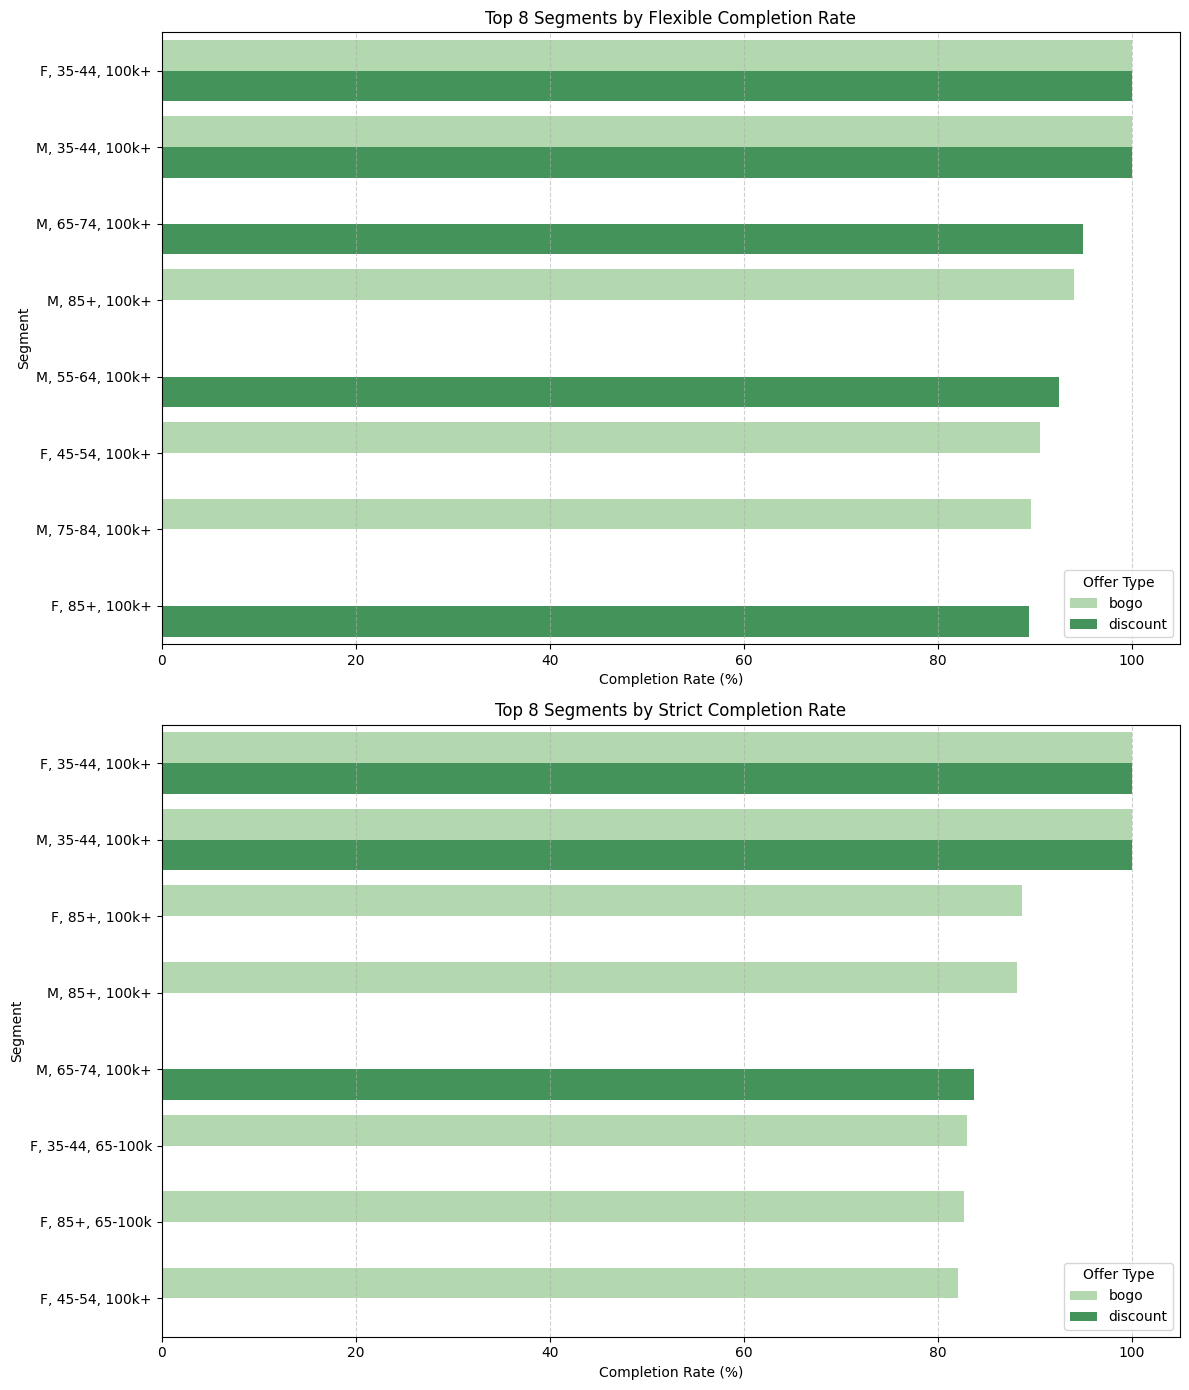

In [20]:
#get top demographic segments by completion rate from definitionsr
top_flex = flex_df.sort_values('Completion Rate (%)', ascending=False).head(10)
top_strict = strict_df.sort_values('Completion Rate (%)', ascending=False).head(10)

#create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 14), sharex=False)

#plot Flex Completion Rate
sns.barplot(
    data=top_flex,
    y='segment',
    x='Completion Rate (%)',
    hue='offer_type',
    palette='Greens',
    ax=axes[0]
)
axes[0].set_title('Top 8 Segments by Flexible Completion Rate')
axes[0].set_xlabel('Completion Rate (%)')
axes[0].set_ylabel('Segment')
axes[0].legend(title='Offer Type')
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

#plot Strict Completion Rate
sns.barplot(
    data=top_strict,
    y='segment',
    x='Completion Rate (%)',
    hue='offer_type',
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title('Top 8 Segments by Strict Completion Rate')
axes[1].set_xlabel('Completion Rate (%)')
axes[1].set_ylabel('Segment')
axes[1].legend(title='Offer Type')
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## **Heatmap Age Group v. Income Bracket for Strict v Flexible Completion**

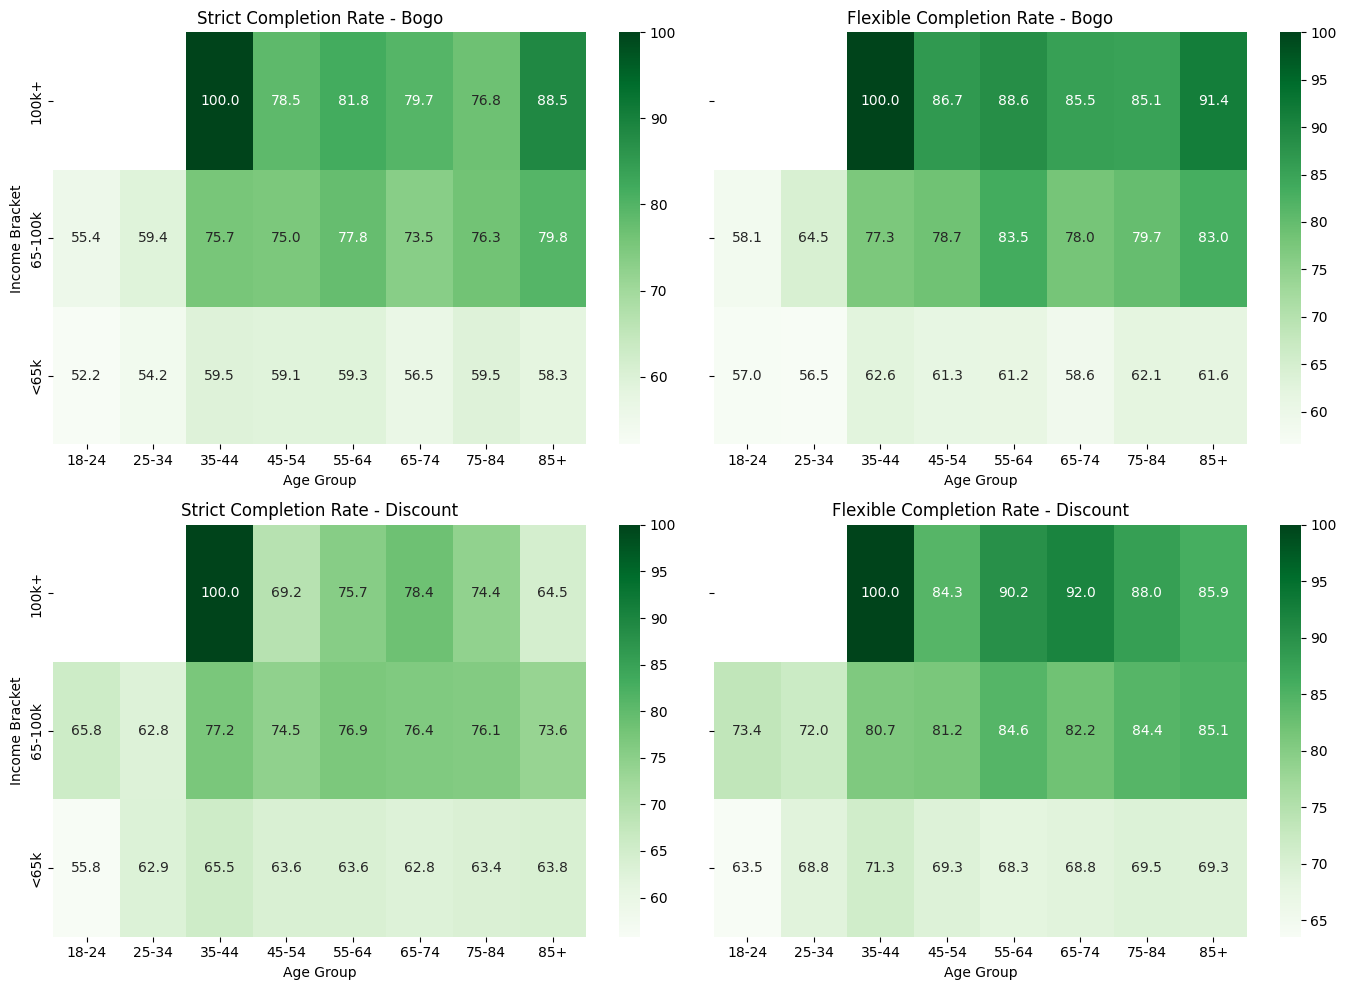

In [21]:
#split segments if not done yet
strict_df[['gender', 'age_group', 'income_bracket']] = strict_df['segment'].str.split(', ', expand=True)
flex_df[['gender', 'age_group', 'income_bracket']] = flex_df['segment'].str.split(', ', expand=True)

#get unique offer types (e.g., ['bogo', 'discount', 'informational'])
offer_types = strict_df['offer_type'].unique()

#create subplots with one row per offer_type
fig, axes = plt.subplots(nrows=len(offer_types), ncols=2, figsize=(14, 5 * len(offer_types)), sharey=True)

for i, offer in enumerate(offer_types):
    #filter for each offer type
    strict_heatmap_data = strict_df[strict_df['offer_type'] == offer]
    flex_heatmap_data = flex_df[flex_df['offer_type'] == offer]

    #pivot tables for heatmaps
    strict_pivot = strict_heatmap_data.pivot_table(
        index='income_bracket', columns='age_group', values='Completion Rate (%)'
    )
    flex_pivot = flex_heatmap_data.pivot_table(
        index='income_bracket', columns='age_group', values='Completion Rate (%)'
    )

    #strict heatmap (left)
    sns.heatmap(strict_pivot, annot=True, fmt=".1f", cmap="Greens", ax=axes[i][0])
    axes[i][0].set_title(f'Strict Completion Rate - {offer.title()}')
    axes[i][0].set_xlabel('Age Group')
    axes[i][0].set_ylabel('Income Bracket')

    #flexible heatmap (right)
    sns.heatmap(flex_pivot, annot=True, fmt=".1f", cmap="Greens", ax=axes[i][1])
    axes[i][1].set_title(f'Flexible Completion Rate - {offer.title()}')
    axes[i][1].set_xlabel('Age Group')
    axes[i][1].set_ylabel('')

plt.tight_layout()
plt.show()


## **Interactive Scatterplot Comparing Viewed and Completion Rate of Both Monetary Offer Types**

In [22]:
fig = px.scatter(
    flex_df,
    x='Completion Rate (%)',
    y='Viewed Rate (%)',
    size='Received',
    color='offer_type',
    hover_name='segment',
    title='Viewed Rate vs. Completion Rate by Segment - Flexible',
    size_max=60,
    color_discrete_sequence=px.colors.sequential.Darkmint
)

fig.update_layout(
    xaxis_title='Completion Rate (%)',
    yaxis_title='Viewed Rate (%)',
    legend_title='Offer Type'
)

fig.show()

In [23]:
fig = px.scatter(
    strict_df,
    x='Viewed Rate (%)',
    y='Completion Rate (%)',
    size='Received',
    color='offer_type',
    hover_name='segment',
    title='Viewed Rate vs. Completion Rate by Segment - Strict',
    size_max=60,
    color_discrete_sequence=px.colors.sequential.Darkmint
)

fig.update_layout(
    xaxis_title='Viewed Rate (%)',
    yaxis_title='Completion Rate (%)',
    legend_title='Offer Type'
)

fig.show()

## **Sunburst Chart for Completion Rate and Demographic**
- starts from center comparing completion rate by gender
- next by gender and age, then by gender, age and income level
- this visualization is great for understanding all the different demographic groups and what level they completed offers and what kind.

In [24]:
flex_df_copy = flex_df.copy()
flex_df_copy[['gender', 'age_group', 'income_bracket']] = flex_df_copy['segment'].str.split(', ', expand=True)

sunburst = px.sunburst(
    flex_df_copy,
    path=['gender', 'age_group', 'income_bracket'],
    values='Viewed',
    color='Completion Rate (%)',
    color_continuous_scale='Greens',
    title='Completion Rate by Demographic Group (Sunburst)'
)

sunburst.show()

# **Offer Function**
- takes a user demographic segment and outputs the offer type based on rule-based heuristics

In [25]:
def get_offer_for_segment(segment, reference_df):
    """
    Takes a segment string in the format 'gender, age_group, income_bracket' and returns the corresponding offer_type
    from the reference DataFrame.

    Parameters:
    - segment (str): A string in the format 'gender, age_group, income_bracket'
    - reference_df (pd.DataFrame): DataFrame that includes columns 'gender', 'age_group', 'income_bracket', 'offer_type'

    Returns:
    - str: offer_type if found, if not returns 'No matching rule found'
    """
    gender, age_group, income_bracket = [s.strip() for s in segment.split(',')]

    match = reference_df[
        (reference_df['gender'] == gender) &
        (reference_df['age_group'] == age_group) &
        (reference_df['income_bracket'] == income_bracket)
    ]

    if not match.empty:
        return match.iloc[0]['offer_type']
    else:
        return 'No matching rule found'

# **Example of How Function Works**

In [26]:
segment_input = "F, 18-24, 65-100k"
offer = get_offer_for_segment(segment_input, flex_df)
print(f"For user in segment demographic '{segment_input}', send offer: {offer}")


For user in segment demographic 'F, 18-24, 65-100k', send offer: bogo
